In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 2.1 MB/s 
     |████████████████████████████████| 209 kB 15.8 MB/s 
     |████████████████████████████████| 81 kB 5.1 MB/s 
     |████████████████████████████████| 78 kB 5.7 MB/s 
     |████████████████████████████████| 112 kB 41.6 MB/s 
     |████████████████████████████████| 147 kB 39.8 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=650774a509b58cb4585b52fbab44ce7c8f54c5e21f08cbcc8edfbd15da5ae858
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [3]:
import pandas as pd
import numpy as np
import os

import scipy
import sklearn
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error as mse,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from tqdm import tqdm
import optuna

pd.set_option('display.max_columns', 50)

In [4]:
DIR = '/content/drive/MyDrive/Competitions/Signate/MUFJ'
INPUT_DIR = os.path.join(DIR,'input')
OUTPUT_DIR = os.path.join(DIR,'output')
OUTPUT_SUB_DIR = os.path.join(OUTPUT_DIR,'submission')
#OUTPUT_MODEL_DIR = os.path.join(OUTPUT_DIR,'model')
OUTPUT_MODEL_DIR19 = DIR + '/output/model/EXP19/'
OUTPUT_MODEL_DIR20 = DIR + '/output/model/EXP20/'
OUTPUT_MODEL_DIR22 = DIR + '/output/model/EXP22/'
OUTPUT_MODEL_DIR23 = DIR + '/output/model/EXP23/'
OUTPUT_MODEL_DIR24 = DIR + '/output/model/EXP24/'
OUTPUT_MODEL_DIR25 = DIR + '/output/model/EXP25/'
OUTPUT_MODEL_DIR27 = DIR + '/output/model/EXP27/'
OUTPUT_MODEL_DIR28 = DIR + '/output/model/EXP28/'
OUTPUT_MODEL_DIR31 = DIR + '/output/model/EXP31/'
OUTPUT_MODEL_DIR41 = DIR + '/output/model/EXP41/'
OUTPUT_MODEL_DIR42 = DIR + '/output/model/EXP42/'

OUTPUT_MODEL_DIR21 = DIR + '/output/model/EXP21/'
OUTPUT_MODEL_DIR43 = DIR + '/output/model/EXP43/'
OUTPUT_MODEL_DIR44 = DIR + '/output/model/EXP44/'
OUTPUT_MODEL_DIR45 = DIR + '/output/model/EXP45/'
OUTPUT_MODEL_DIR46 = DIR + '/output/model/EXP46/'

OUTPUT_MODEL_DIR34 = DIR + '/output/model/EXP34/'
OUTPUT_MODEL_DIR39 = DIR + '/output/model/EXP39/'
OUTPUT_MODEL_DIR40 = DIR + '/output/model/EXP40/'
OUTPUT_MODEL_DIR47 = DIR + '/output/model/EXP47/'
OUTPUT_MODEL_DIR48 = DIR + '/output/model/EXP48/'

In [5]:
class CFG19:
    num_workers=4
    path=OUTPUT_MODEL_DIR19
    config_path=path+'config.pth'
    model="microsoft/deberta-v3-base"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True

class CFG20:
    num_workers=4
    path=OUTPUT_MODEL_DIR20
    config_path=path+'config.pth'
    model="microsoft/deberta-v3-large"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True

class CFG22:
    num_workers=4
    path=OUTPUT_MODEL_DIR22
    config_path=path+'config.pth'
    model="facebook/bart-large"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=128
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True

class CFG23:
    num_workers=4
    path=OUTPUT_MODEL_DIR23
    config_path=path+'config.pth'
    model="microsoft/deberta-large"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True

class CFG24:
    num_workers=4
    path=OUTPUT_MODEL_DIR24
    config_path=path+'config.pth'
    model="funnel-transformer/large"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True

class CFG25:
    num_workers=4
    path=OUTPUT_MODEL_DIR25
    config_path=path+'config.pth'
    model="xlnet-large-cased"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=128
    seed=42
    n_fold=4
    trn_fold=[1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True

class CFG27:
    num_workers=4
    path=OUTPUT_MODEL_DIR27
    config_path=path+'config.pth'
    model="microsoft/deberta-xlarge"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True

class CFG28:
    num_workers=4
    path=OUTPUT_MODEL_DIR28
    config_path=path+'config.pth'
    model="microsoft/deberta-base"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True

class CFG31:
    num_workers=4
    path=OUTPUT_MODEL_DIR31
    config_path=path+'config.pth'
    model="funnel-transformer/medium"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True

class CFG41:
    num_workers=4
    path=OUTPUT_MODEL_DIR41
    config_path=path+'config.pth'
    model="facebook/bart-base"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True

class CFG42:
    num_workers=4
    path=OUTPUT_MODEL_DIR42
    config_path=path+'config.pth'
    model="facebook/bart-large-mnli"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=180
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True


class CFG21:
    num_workers=4
    path=OUTPUT_MODEL_DIR21
    config_path=path+'config.pth'
    model="microsoft/deberta-v3-base"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True

class CFG43:
    num_workers=4
    path=OUTPUT_MODEL_DIR43
    config_path=path+'config.pth'
    model="funnel-transformer/large"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = False

class CFG44:
    num_workers=4
    path=OUTPUT_MODEL_DIR44
    config_path=path+'config.pth'
    model="microsoft/deberta-v3-large"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=True
    clean_content = True

class CFG45:
    num_workers=4
    path=OUTPUT_MODEL_DIR45
    config_path=path+'config.pth'
    model="facebook/bart-large-mnli"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=180
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = False

class CFG46:
    num_workers=4
    path=OUTPUT_MODEL_DIR46
    config_path=path+'config.pth'
    model="microsoft/deberta-base"
    batch_size=32
    fc_dropout=0.2
    target_size=1
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True


class CFG34:
    num_workers=4
    path=OUTPUT_MODEL_DIR34
    config_path=path+'config.pth'
    model="microsoft/deberta-v3-base"
    batch_size=32
    fc_dropout=0.2
    target_size=2
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True
    target_cols = ["state","category1"]

class CFG39:
    num_workers=4
    path=OUTPUT_MODEL_DIR39
    config_path=path+'config.pth'
    model="microsoft/deberta-v3-large"
    batch_size=32
    fc_dropout=0.2
    target_size=2
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True
    target_cols = ["state","category1"]

class CFG40:
    num_workers=4
    path=OUTPUT_MODEL_DIR40
    config_path=path+'config.pth'
    model="microsoft/deberta-xlarge"
    batch_size=32
    fc_dropout=0.2
    target_size=2
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=True
    freezing=True
    clean_content = True
    target_cols = ["state","category1"]

class CFG47:
    num_workers=4
    path=OUTPUT_MODEL_DIR47
    config_path=path+'config.pth'
    model="funnel-transformer/large"
    batch_size=32
    fc_dropout=0.2
    target_size=2
    max_len=256
    seed=42
    n_fold=4
    trn_fold=[0, 1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True
    target_cols = ["state","category1"]

class CFG48:
    num_workers=4
    path=OUTPUT_MODEL_DIR48
    config_path=path+'config.pth'
    model="facebook/bart-large-mnli"
    batch_size=32
    fc_dropout=0.2
    target_size=2
    max_len=180
    seed=42
    n_fold=4
    trn_fold=[1, 2, 3]
    gradient_checkpointing=False
    freezing=False
    clean_content = True
    target_cols = ["state","category1"]

In [6]:
oof_19 = pd.read_pickle(CFG19.path+'oof_df.pkl')
oof_20 = pd.read_pickle(CFG20.path+'oof_df.pkl')
oof_22 = pd.read_pickle(CFG22.path+'oof_df.pkl')
oof_23 = pd.read_pickle(CFG23.path+'oof_df.pkl')
oof_24 = pd.read_pickle(CFG24.path+'oof_df.pkl')
oof_25 = pd.read_pickle(CFG25.path+'oof_df.pkl')
oof_27 = pd.read_pickle(CFG27.path+'oof_df.pkl')
oof_28 = pd.read_pickle(CFG28.path+'oof_df.pkl')
oof_31 = pd.read_pickle(CFG31.path+'oof_df.pkl')
oof_41 = pd.read_pickle(CFG41.path+'oof_df.pkl')
oof_42 = pd.read_pickle(CFG42.path+'oof_df.pkl')

oof_21 = pd.read_pickle(CFG21.path+'oof_df.pkl')
oof_43 = pd.read_pickle(CFG43.path+'oof_df.pkl')
oof_44 = pd.read_pickle(CFG44.path+'oof_df.pkl')
oof_45 = pd.read_pickle(CFG45.path+'oof_df.pkl')
oof_46 = pd.read_pickle(CFG46.path+'oof_df.pkl')

oof_34 = pd.read_pickle(CFG34.path+'oof_df.pkl')
oof_39 = pd.read_pickle(CFG39.path+'oof_df.pkl')
oof_40 = pd.read_pickle(CFG40.path+'oof_df.pkl')
oof_47 = pd.read_pickle(CFG47.path+'oof_df.pkl')
oof_48 = pd.read_pickle(CFG48.path+'oof_df.pkl')

In [7]:
_df = pd.DataFrame()

_df["state"] = oof_25['state'].values

_df["model_19"] = oof_19['pred'].values
_df["model_20"] = oof_20['pred'].values
_df["model_22"] = oof_22['pred'].values
_df["model_23"] = oof_23['pred'].values
_df["model_24"] = oof_24['pred'].values
_df["model_25"] = oof_25['pred'].values
_df["model_27"] = oof_27['pred'].values
_df["model_28"] = oof_28['pred'].values
_df["model_31"] = oof_31['pred'].values
_df["model_41"] = oof_41['pred'].values
_df["model_42"] = oof_42['pred'].values

_df["model_21"] = oof_21['pred'].values
_df["model_43"] = oof_43['pred'].values
_df["model_44"] = oof_44['pred'].values
_df["model_45"] = oof_45['pred'].values
_df["model_46"] = oof_46['pred'].values

_df["model_34"] = oof_34["pred_state"].values
_df["model_39"] = oof_39["pred_state"].values
_df["model_40"] = oof_40["pred_state"].values
_df["model_47"] = oof_47["pred_state"].values
_df["model_48"] = oof_48["pred_state"].values

df_corr = _df.corr()
df_corr

,state,model_19,model_20,model_22,model_23,model_24,model_25,model_27,model_28,model_31,model_41,model_42,model_21,model_43,model_44,model_45,model_46,model_34,model_39,model_40,model_47,model_48
state,1.000000,0.672324,0.663560,0.662339,0.660524,0.634091,0.621772,0.664955,0.657560,0.647089,0.659626,0.670414,0.663269,0.648581,0.665239,0.671074,0.661358,0.679265,0.662137,0.657829,0.651747,0.662559
model_19,0.672324,1.000000,0.873577,0.836251,0.857141,0.819231,0.800149,0.856656,0.854968,0.863286,0.857741,0.853027,0.933328,0.841395,0.865238,0.858998,0.844095,0.941836,0.855211,0.847204,0.830485,0.843305
model_20,0.663560,0.873577,1.000000,0.816755,0.838587,0.824691,0.764297,0.850213,0.822341,0.823857,0.823793,0.835451,0.855709,0.846476,0.894299,0.836522,0.824883,0.871598,0.887829,0.834118,0.841558,0.803349
model_22,0.662339,0.836251,0.816755,1.000000,0.836909,0.774819,0.844586,0.834356,0.849939,0.822153,0.882192,0.892581,0.832531,0.798434,0.801502,0.891559,0.853946,0.851971,0.807139,0.816845,0.799960,0.874467
model_23,0.660524,0.857141,0.838587,0.836909,1.000000,0.802131,0.806306,0.897928,0.857039,0.840367,0.849287,0.847651,0.838731,0.828684,0.834653,0.864914,0.866311,0.855749,0.851217,0.874170,0.821728,0.845693
model_24,0.634091,0.819231,0.824691,0.774819,0.802131,1.000000,0.742985,0.805022,0.788011,0.808958,0.777029,0.805019,0.795514,0.878798,0.812950,0.801690,0.779814,0.810644,0.808293,0.807131,0.865614,0.770221
model_25,0.621772,0.800149,0.764297,0.844586,0.806306,0.742985,1.000000,0.791462,0.797608,0.795548,0.814800,0.827532,0.793479,0.768511,0.753390,0.843203,0.815795,0.807340,0.775473,0.772372,0.767206,0.832394
model_27,0.664955,0.856656,0.850213,0.834356,0.897928,0.805022,0.791462,1.000000,0.839240,0.824946,0.850226,0.851963,0.842488,0.833937,0.843251,0.858116,0.858083,0.863056,0.855009,0.868816,0.824006,0.823381
model_28,0.657560,0.854968,0.822341,0.849939,0.857039,0.788011,0.797608,0.839240,1.000000,0.849307,0.883095,0.857464,0.870710,0.817769,0.831262,0.858413,0.915903,0.873755,0.810635,0.853713,0.811992,0.837634
model_31,0.647089,0.863286,0.823857,0.822153,0.840367,0.808958,0.795548,0.824946,0.849307,1.000000,0.842608,0.838881,0.859787,0.837969,0.830760,0.845033,0.827321,0.871793,0.815604,0.829273,0.820301,0.822798


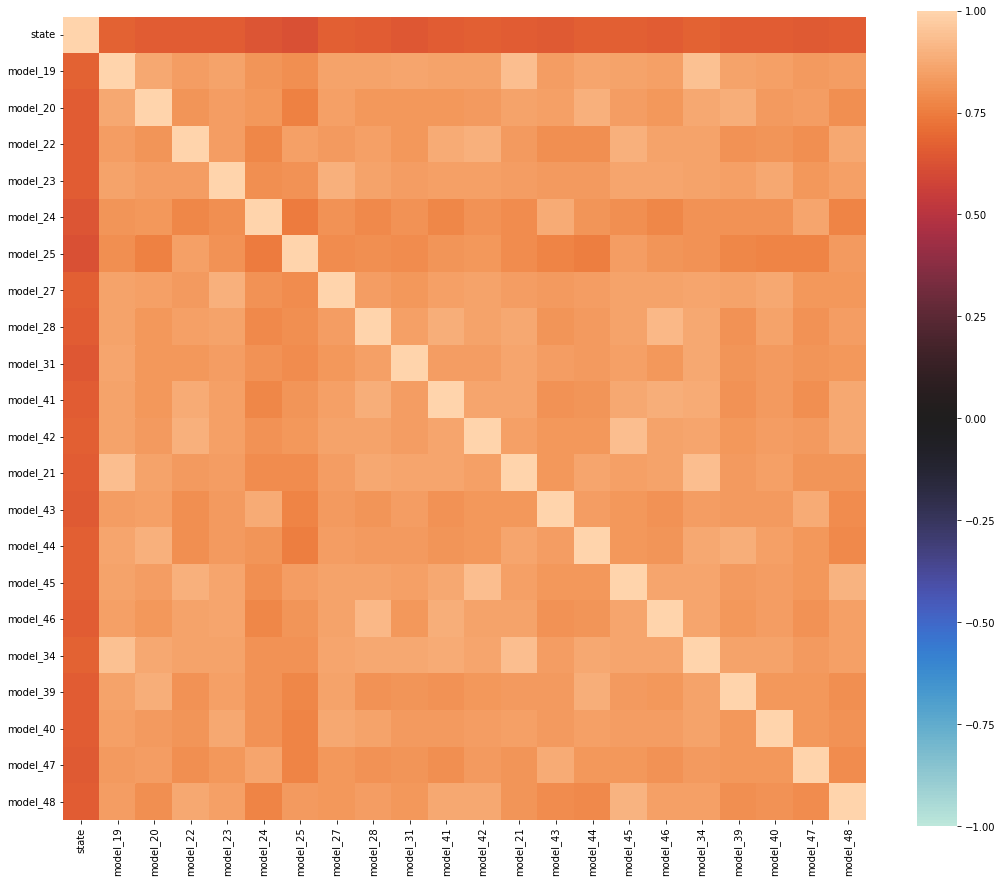

In [8]:
fig, ax = plt.subplots(figsize=(18, 15)) 
sns.heatmap(df_corr, square=True, vmax=1, vmin=-1, center=0)

In [10]:
y_true = oof_25['state'].values

preds_df = pd.DataFrame()

preds_df["model_19"] = oof_19['pred'].values
preds_df["model_20"] = oof_20['pred'].values
preds_df["model_22"] = oof_22['pred'].values
preds_df["model_23"] = oof_23['pred'].values
preds_df["model_24"] = oof_24['pred'].values
preds_df["model_25"] = oof_25['pred'].values
preds_df["model_27"] = oof_27['pred'].values
preds_df["model_28"] = oof_28['pred'].values
preds_df["model_31"] = oof_31['pred'].values
preds_df["model_41"] = oof_41['pred'].values
preds_df["model_42"] = oof_42['pred'].values

preds_df["model_21"] = oof_21['pred'].values
preds_df["model_43"] = oof_43['pred'].values
preds_df["model_44"] = oof_44['pred'].values
preds_df["model_45"] = oof_45['pred'].values
preds_df["model_46"] = oof_46['pred'].values

preds_df["model_34"] = oof_34["pred_state"].values
preds_df["model_39"] = oof_39["pred_state"].values
preds_df["model_40"] = oof_40["pred_state"].values
preds_df["model_47"] = oof_47["pred_state"].values
preds_df["model_48"] = oof_48["pred_state"].values

In [ ]:
preds_df2 = pd.DataFrame()

preds_25_28 = (preds_df["model_25"]+preds_df["model_28"]) / 2  
preds_df2["preds1"] = (preds_df["model_22"]+preds_df["model_23"]+preds_df["model_24"]+preds_df["model_31"]+preds_25_28+preds_df["model_41"]) / 6
preds_df2["preds2"] = (preds_df["model_19"]+preds_df["model_20"]+preds_df["model_27"]+preds_df["model_42"]) / 4
preds_df2["preds3"] = preds_df["model_21"]*.35+preds_df["model_43"]*.35+preds_df["model_46"]*.3
preds_df2["preds4"] = (preds_df["model_45"]+preds_df["model_44"]) / 2
#preds_df2["preds5"] = (preds_df["model_40"]+preds_df["model_47"]+preds_df["model_48"]) / 3
preds_df2["preds5"] = (preds_df["model_47"]+preds_df["model_48"]) / 2
preds_df2["preds6"] = (preds_df["model_34"]+preds_df["model_39"])/2

In [ ]:
#oof > 0.805
preds_df3 = pd.DataFrame()

preds_df3["model_19"] = oof_19['pred'].values
preds_df3["model_20"] = oof_20['pred'].values
preds_df3["model_22"] = oof_22['pred'].values
preds_df3["model_23"] = oof_23['pred'].values
preds_df3["model_24"] = oof_24['pred'].values
preds_df3["model_27"] = oof_27['pred'].values
preds_df3["model_31"] = oof_31['pred'].values
preds_df3["model_42"] = oof_42['pred'].values

preds_df3["model_21"] = oof_21['pred'].values
preds_df3["model_43"] = oof_43['pred'].values
preds_df3["model_44"] = oof_44['pred'].values
preds_df3["model_45"] = oof_45['pred'].values

preds_df3["model_34"] = oof_34["pred_state"].values
preds_df3["model_39"] = oof_39["pred_state"].values
#preds_df3["model_40"] = oof_40["pred_state"].values
preds_df3["model_47"] = oof_47["pred_state"].values
preds_df3["model_48"] = oof_48["pred_state"].values

In [9]:
#oof > 0.81
preds_df4 = pd.DataFrame()

preds_df4["model_19"] = oof_19['pred'].values
preds_df4["model_20"] = oof_20['pred'].values
preds_df4["model_27"] = oof_27['pred'].values
preds_df4["model_42"] = oof_42['pred'].values


preds_df4["model_44"] = oof_44['pred'].values
preds_df4["model_45"] = oof_45['pred'].values

preds_df4["model_34"] = oof_34["pred_state"].values
preds_df4["model_39"] = oof_39["pred_state"].values
preds_df4["model_40"] = oof_40["pred_state"].values
#preds_df4["model_48"] = oof_48["pred_state"].values

In [ ]:
preds_df5 = pd.DataFrame()
staking_oof = pd.read_csv(os.path.join(OUTPUT_DIR,"staking_oof.csv"))
y_true = staking_oof['state'].values

preds_df5["pred_lgb"] = staking_oof["pred_lgb"]
preds_df5["pred_ctb"] = staking_oof["pred_ctb"]
preds_df5["pred_logit"] = staking_oof["pred_logit"]
preds_df5["pred_svm"] = staking_oof["pred_svm"]

In [11]:
SEED = 42
np.random.seed(SEED)

#n_models = preds_df.shape[1]
#max_iter = 1000

#n_models2 = preds_df2.shape[1]
#max_iter2 = 400

#n_models3 = preds_df3.shape[1]
#max_iter3 = 1000

n_models4 = preds_df4.shape[1]
max_iter4 = 800

#n_models5 = preds_df5.shape[1]
#max_iter5 = 400

In [ ]:
#for model_name, y_pred in preds_df.iteritems():
#    print('MSE ({0}): {1:.4f}'.format(model_name, mse(y_true, y_pred)))

In [ ]:
def calc_score(weight = np.ones(n_models)):
    y_pred_blended = np.average(preds_df, axis = 1, weights = weight)
    return mse(y_pred_blended, y_true)

##Random Search

In [ ]:
#scores = []
#weights = []

In [ ]:
#initial_weights = np.random.uniform(size = (max_iter, n_models))

In [ ]:
#for i in tqdm(range(max_iter)):
#    # 最適化のときの条件出し
#    bounds = [(0,1)] * n_models

#    result = minimize(calc_score, initial_weights[i], method = 'Nelder-Mead', bounds = bounds)
#    score = result['fun']
#    weight = result['x']
#    # message = result['message']
#    scores.append(score)
#    weights.append(weight)

In [ ]:
#i_argmin = np.argmin(scores)
#print('{}回目が最適．'.format(i_argmin))

In [ ]:
#best_score = scores[i_argmin]
#best_weight = weights[i_argmin]
#best_weight /= np.sum(best_weight)
#print('best score: {0}\nbest weight: {1}'.format(best_score, best_weight))

##Oputuna

In [ ]:
#class Objective:
#    def __init__(self, n_models):
#        self.n_models = n_models

#    def __call__(self, trial):
#        weight = [trial.suggest_uniform('weight' + str(n), 0, 1) for n in range(self.n_models)]
#        return calc_score(weight)
#objective = Objective(n_models)

#sampler = optuna.samplers.TPESampler(seed=SEED)
#study = optuna.create_study(sampler = sampler)
#study.optimize(objective, n_trials = max_iter, n_jobs = -1)

In [ ]:
#best_weight = list(study.best_params.values())
#best_weight = np.array(best_weight) / np.sum(best_weight)
#best_score = study.best_value
#print('best score: {0}\nbest weight: {1}'.format(best_score, best_weight))

In [ ]:
def calc_f1_score(weight = np.ones(n_models)):
    thresh = 0.5
    y_pred_blended = np.average(preds_df, axis = 1, weights = weight)
    return f1_score(y_true, (y_pred_blended>thresh).astype(int))

In [ ]:
def calc_f1_score2(weight = np.ones(n_models2)):
    thresh = 0.5
    y_pred_blended = np.average(preds_df2, axis = 1, weights = weight)
    return f1_score(y_true, (y_pred_blended>thresh).astype(int))

In [ ]:
def calc_f1_score3(weight = np.ones(n_models3)):
    thresh = 0.5
    y_pred_blended = np.average(preds_df3, axis = 1, weights = weight)
    return f1_score(y_true, (y_pred_blended>thresh).astype(int))

In [12]:
def calc_f1_score4(weight = np.ones(n_models4)):
    thresh = 0.5
    y_pred_blended = np.average(preds_df4, axis = 1, weights = weight)
    return f1_score(y_true, (y_pred_blended>thresh).astype(int))

In [ ]:
def calc_f1_score5(weight = np.ones(n_models5)):
    thresh = 0.5
    y_pred_blended = np.average(preds_df5, axis = 1, weights = weight)
    return f1_score(y_true, (y_pred_blended>thresh).astype(int))

In [ ]:
class Objective:
    def __init__(self, n_models):
        self.n_models = n_models

    def __call__(self, trial):
        weight = [trial.suggest_uniform('weight' + str(n), 0, 1) for n in range(self.n_models)]
        return calc_f1_score(weight)
objective = Objective(n_models)

sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(sampler = sampler,direction='maximize')
study.optimize(objective, n_trials = max_iter, n_jobs = -1)

[I 2022-09-21 15:44:11,598] A new study created in memory with name: no-name-d8550aeb-e7b7-4af4-8f74-e8684f3af764
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
[I 2022-09-21 15:44:11,662] Trial 0 finished with value: 0.8294480972305242 and parameters: {'weight0': 0.02614914098199983, 'weight1': 0.08566455082469737, 'weight2': 0.6800149174645926, 'weight3': 0.2792304824002164, 'weight4': 0.034956463583814434, 'weight5': 0.06403805572441168, 'weight6': 0.6253654978386223, 'weight7': 0.40321933352016126, 'weight8': 0.5249507798613194, 'weight9': 0.14693850846772127, 'weight10': 0.7278718418730908, 'weight11': 0.4363589385175689, 'weight12': 0.6550590793654466, 'weight13': 0.8209548853341183, 'weight14': 0.7971591392858225, 'weight15': 0.0633251956392149, 'w

In [ ]:
#best_weight = list(study.best_params.values())
#best_weight = np.array(best_weight) / np.sum(best_weight)
#best_score = study.best_value
#print('best score: {0}\nbest weight: {1}'.format(best_score, best_weight))

"""
best score: 0.8319967923015238
best weight: [0.06470878 0.0131939  0.06180668 0.05055884 0.02008916 0.06263664
 0.08175019 0.03084266 0.03858474 0.02707047 0.08370543 0.07534494
 0.08425437 0.07985377 0.08337871 0.01404711 0.02728774 0.00701513
 0.03316138 0.02549253 0.03521683]
 """

best score: 0.8319967923015238
best weight: [0.06470878 0.0131939  0.06180668 0.05055884 0.02008916 0.06263664
 0.08175019 0.03084266 0.03858474 0.02707047 0.08370543 0.07534494
 0.08425437 0.07985377 0.08337871 0.01404711 0.02728774 0.00701513
 0.03316138 0.02549253 0.03521683]


In [ ]:
best_weight = list(study.best_params.values())
best_weight = np.array(best_weight) / np.sum(best_weight)
best_score = study.best_value
print('best score: {0}\nbest weight: {1}'.format(best_score, best_weight))

best score: 0.8315326130452182
best weight: [0.04634192 0.07978846 0.07924702 0.01390172 0.01331155 0.07334459
 0.06944196 0.01983112 0.05739289 0.00253362 0.08199275 0.05239074
 0.07490017 0.07552779 0.07464737 0.06809275 0.0231819  0.00468019
 0.00587878 0.08357269]


In [ ]:
class Objective2:
    def __init__(self, n_models2):
        self.n_models = n_models2

    def __call__(self, trial):
        weight = [trial.suggest_uniform('weight' + str(n), 0, 1) for n in range(self.n_models)]
        return calc_f1_score2(weight)
objective2 = Objective2(n_models2)

sampler = optuna.samplers.TPESampler(seed=SEED)
study2 = optuna.create_study(sampler = sampler,direction='maximize')
study2.optimize(objective2, n_trials = max_iter2, n_jobs = -1)

[I 2022-09-21 15:47:46,016] A new study created in memory with name: no-name-968bc30f-c297-4ec7-83d7-d10d66239afb
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
[I 2022-09-21 15:47:46,047] Trial 1 finished with value: 0.8276207656845059 and parameters: {'weight0': 0.9297214761993756, 'weight1': 0.34244226864218164, 'weight2': 0.33124056494431653, 'weight3': 0.4665143797917968, 'weight4': 0.2236180685344341, 'weight5': 0.6498546632636555}. Best is trial 1 with value: 0.8276207656

In [ ]:
#best_weight2 = list(study2.best_params.values())
#best_weight2 = np.array(best_weight2) / np.sum(best_weight2)
#best_score2 = study2.best_value
#print('best score: {0}\nbest weight: {1}'.format(best_score2, best_weight2))

"""
best score: 0.831077694235589
best weight: [0.04754912 0.04911001 0.37500948 0.37216546 0.01848971 0.13767623]
"""

best score: 0.831077694235589
best weight: [0.04754912 0.04911001 0.37500948 0.37216546 0.01848971 0.13767623]


In [ ]:
best_weight2 = list(study2.best_params.values())
best_weight2 = np.array(best_weight2) / np.sum(best_weight2)
best_score2 = study2.best_value
print('best score: {0}\nbest weight: {1}'.format(best_score2, best_weight2))

best score: 0.8304948908034462
best weight: [0.21449123 0.01696195 0.22515263 0.35464078 0.03059036 0.15816304]


In [ ]:
class Objective3:
    def __init__(self, n_models3):
        self.n_models = n_models3

    def __call__(self, trial):
        weight = [trial.suggest_uniform('weight' + str(n), 0, 1) for n in range(self.n_models)]
        return calc_f1_score3(weight)
objective3 = Objective3(n_models3)

sampler = optuna.samplers.TPESampler(seed=SEED)
study3 = optuna.create_study(sampler = sampler,direction='maximize')
study3.optimize(objective3, n_trials = max_iter3, n_jobs = -1)

[I 2022-09-21 15:48:53,950] A new study created in memory with name: no-name-61fe88f8-8941-4bed-a35f-d79c89c89767
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
[I 2022-09-21 15:48:53,977] Trial 0 finished with value: 0.827531012404962 and parameters: {'weight0': 0.23722583702150013, 'weight1': 0.012750301950053444, 'weight2': 0.3628251574044479, 'weight3': 0.8548717388799617, 'weight4': 0.08908571575513557, 'weight5': 0.9772139862890931, 'weight6': 0.16433845399609803, 'weight7': 0.538686903917031, 'weight8': 0.9968001301241335, 'weight9': 0.7877604720332435, 'weight10': 0.13390286379103666, 'weight11': 0.18414123393727, 'weight12': 0.4467737295118679, 'weight13': 0.2293504174183134, 'weight14': 0.11999165282488922, 'weight15': 0.4653110142954161}. Best 

In [ ]:
#best_weight3 = list(study3.best_params.values())
#best_weight3 = np.array(best_weight3) / np.sum(best_weight3)
#best_score3 = study3.best_value
#print('best score: {0}\nbest weight: {1}'.format(best_score3, best_weight3))

"""
best score: 0.8310099287935011
best weight: [0.03209519 0.00845168 0.12410198 0.00022835 0.05227489 0.10028456
 0.00259968 0.01994933 0.11993072 0.0957319  0.09343536 0.11866233
 0.05481453 0.05538527 0.10995686 0.0027024  0.00939497]
 """

best score: 0.8310099287935011
best weight: [0.03209519 0.00845168 0.12410198 0.00022835 0.05227489 0.10028456
 0.00259968 0.01994933 0.11993072 0.0957319  0.09343536 0.11866233
 0.05481453 0.05538527 0.10995686 0.0027024  0.00939497]


In [ ]:
best_weight3 = list(study3.best_params.values())
best_weight3 = np.array(best_weight3) / np.sum(best_weight3)
best_score3 = study3.best_value
print('best score: {0}\nbest weight: {1}'.format(best_score3, best_weight3))

best score: 0.8319903303787268
best weight: [0.08771571 0.05629589 0.01652287 0.02771205 0.01048438 0.11410127
 0.04871708 0.11278922 0.04335175 0.10829126 0.10222701 0.03187614
 0.07385553 0.10005615 0.0199686  0.04603509]


In [13]:
class Objective4:
    def __init__(self, n_models4):
        self.n_models = n_models4

    def __call__(self, trial):
        weight = [trial.suggest_uniform('weight' + str(n), 0, 1) for n in range(self.n_models)]
        return calc_f1_score4(weight)
objective4 = Objective4(n_models4)

sampler = optuna.samplers.TPESampler(seed=SEED)
study4 = optuna.create_study(sampler = sampler,direction='maximize')
study4.optimize(objective4, n_trials = max_iter4, n_jobs = -1)

[I 2022-09-22 06:29:03,535] A new study created in memory with name: no-name-c3c74dea-3b7c-448e-94b5-ed78f0df73b5
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
[I 2022-09-22 06:29:03,581] Trial 0 finished with value: 0.8265727226975339 and parameters: {'weight0': 0.7026186639133244, 'weight1': 0.8154527120303116, 'weight2': 0.3226648657484623, 'weight3': 0.965621836055192, 'weight4': 0.8792283736336586, 'weight5': 0.9642415362487443, 'weight6': 0.36770976063760064, 'weight7': 0

In [ ]:
#best_weight4 = list(study4.best_params.values())
#best_weight4 = np.array(best_weight4) / np.sum(best_weight4)
#best_score4 = study4.best_value
#print('best score: {0}\nbest weight: {1}'.format(best_score4, best_weight4))

"""
best score: 0.8315239244069159
best weight: [0.03682987 0.0061083  0.11077566 0.10054404 0.16015766 0.03514027
 0.12992343 0.15352078 0.12774139 0.13925859]
"""

best score: 0.8315239244069159
best weight: [0.03682987 0.0061083  0.11077566 0.10054404 0.16015766 0.03514027
 0.12992343 0.15352078 0.12774139 0.13925859]


In [14]:
best_weight4 = list(study4.best_params.values())
best_weight4 = np.array(best_weight4) / np.sum(best_weight4)
best_score4 = study4.best_value
print('best score: {0}\nbest weight: {1}'.format(best_score4, best_weight4))

best score: 0.8311531495270678
best weight: [0.05522093 0.02881109 0.11618671 0.08329814 0.17960194 0.13047173
 0.11544728 0.16952728 0.12143489]


In [ ]:
class Objective5:
    def __init__(self, n_models5):
        self.n_models = n_models5

    def __call__(self, trial):
        weight = [trial.suggest_uniform('weight' + str(n), 0, 1) for n in range(self.n_models)]
        return calc_f1_score5(weight)
objective5 = Objective5(n_models5)

sampler = optuna.samplers.TPESampler(seed=SEED)
study5 = optuna.create_study(sampler = sampler,direction='maximize')
study5.optimize(objective5, n_trials = max_iter5, n_jobs = -1)

[I 2022-09-21 14:43:29,075] A new study created in memory with name: no-name-834805f7-fa40-4c92-b7d5-c44e8a969499
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
[I 2022-09-21 14:43:29,119] Trial 0 finished with value: 0.8237726098191216 and parameters: {'weight0': 0.6987811854905054, 'weight1': 0.7555983121157555, 'weight2': 0.4258834783110098, 'weight3': 0.9311656518193974}. Best is trial 0 with value: 0.8237726098191216.
[I 2022-09-21 14:43:29,125] Trial 1 finished with value:

In [ ]:
best_weight5 = list(study5.best_params.values())
best_weight5 = np.array(best_weight5) / np.sum(best_weight5)
best_score5 = study5.best_value
print('best score: {0}\nbest weight: {1}'.format(best_score5, best_weight5))

best score: 0.8254950495049506
best weight: [1.40719207e-01 3.79171486e-02 3.99166372e-05 8.21323728e-01]
